In [2]:
import descarteslabs as dl
from pprint import pprint

**Experiment with Descartes Labs API and inventory datasets**

Goal - employ remote sensing technique developed by Stanford Scientists to forecast the landsacpe of poverty.

http://sustain.stanford.edu/predicting-poverty/

Let's see what datasets are available via the Descartes Labs API.


In [3]:
sources = dl.metadata.sources()
pprint (sources)

[{u'product': u'modis:09:CREFL', u'sat_id': u'Terra'},
 {u'product': u'modis:09:CREFL', u'sat_id': u'Aqua'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2A'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2B'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'LANDSAT_7'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'Landsat7'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'LANDSAT_5'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'Landsat5'},
 {u'product': u'sentinel-3:OLCI_RGB', u'sat_id': u'S3A'},
 {u'product': u'landsat:LC08:PRE:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'usda:naip:rgbn', u'sat_id': u'NAIP'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1A'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1B'},
 {u'product': u'landsat:LC08:PRE:LaSRC', u'sat_id': u'L8SR'},
 {u'product': u'usda:naip:rgbn:v1', u'sat_id': u'NAIP'},
 {u'product': u'landsat:LC08:01:RT:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'landsat:LC08:01:T1:T

In [4]:
# Import plotting packages
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry
import cartopy

In [23]:
# Find potential matches
matches = dl.places.find('turkey')
pprint(matches)
aoi = matches[0]
shape = dl.places.shape(aoi['slug'], geom='low')

[{u'bbox': [25.664528, 35.80768, 44.818128, 42.104165],
  u'id': 85632393,
  u'name': u'turkey',
  u'path': u'continent:africa_country:turkey',
  u'placetype': u'country',
  u'slug': u'asia_turkey'}]


/usr/local/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


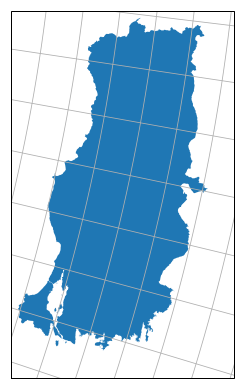

In [10]:
aoi = matches[0]
shape = dl.places.shape(aoi['slug'], geom='low')
bbox = shape['bbox']

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(4, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here
shp = shapely.geometry.shape(shape['geometry'])

# When adding a geometry in latlon coordinates, specify the latlon projection
ax.add_geometries([shp], lonlat_crs)

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

In [11]:
import json
feature_collection = dl.metadata.search(products='landsat:LC08:PRE:TOAR', start_time='2017-03-12',
                                        end_time='2017-03-20', limit=10, place=aoi['slug'])

In [34]:
print len(feature_collection)
f0 = feature_collection['features'][1]
pprint(f0)

2
{u'geometry': {u'coordinates': [[[31.6225117, 38.510361],
                                 [33.6732991, 38.1119486],
                                 [33.1317348, 36.4238054],
                                 [31.1311552, 36.820484],
                                 [31.6225117, 38.510361]]],
               u'type': u'Polygon'},
 u'id': u'landsat:LC08:PRE:TOAR:meta_LC81770342017073_v1',
 u'key': u'meta_LC81770342017073_v1',
 u'properties': {u'acquired': u'2017-03-14T08:27:47.081220Z',
                 u'area': 35561.9,
                 u'bits_per_pixel': [1.922, 2.486, 1.523],
                 u'bright_fraction': 0.5126,
                 u'bucket': u'gs://descartes-l8/',
                 u'cloud_fraction': 0.3782,
                 u'cloud_fraction_0': 0.3549,
                 u'cs_code': u'EPSG:32636',
                 u'descartes_version': u'hedj-landsat-0.9.7.4',
                 u'file_md5s': [u'9ca8e8e80ef7491e20af6c7725228d42',
                                u'e8cabea09cf865123

In [39]:
arr, meta = dl.raster.ndarray(
    f0['id'],
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    data_type='Byte',
    resolution=30,
#     cutline=shape['geometry'],
)


GatewayTimeoutError: Your request timed out on the server. Consider reducing the complexity of your request.